Name: Safwan Fathi bin Muhammad FahmiRauf
Mat Number:1810009

Question: A) Apply both Canny Edge Detection and Sobel Edge Detection to only the face area of the image using a suitable threshold values. (5 Marks)

*   List item
*   List item



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/KPTPACE-DLCV-Workshop.gitfront/Assignment 1/'

In [24]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import glob
import matplotlib.pyplot as plt
import math

In [5]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [10]:
try:
  img = 1
  while(img<4):
    image = take_photo(path+'Safwan%d.jpg' %img)
    print(image)
    img +=1
  
  # Show the image which was just taken.

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

/content/drive/MyDrive/KPTPACE-DLCV-Workshop.gitfront/Assignment 1/Safwan1.jpg


<IPython.core.display.Javascript object>

/content/drive/MyDrive/KPTPACE-DLCV-Workshop.gitfront/Assignment 1/Safwan2.jpg


<IPython.core.display.Javascript object>

/content/drive/MyDrive/KPTPACE-DLCV-Workshop.gitfront/Assignment 1/Safwan3.jpg


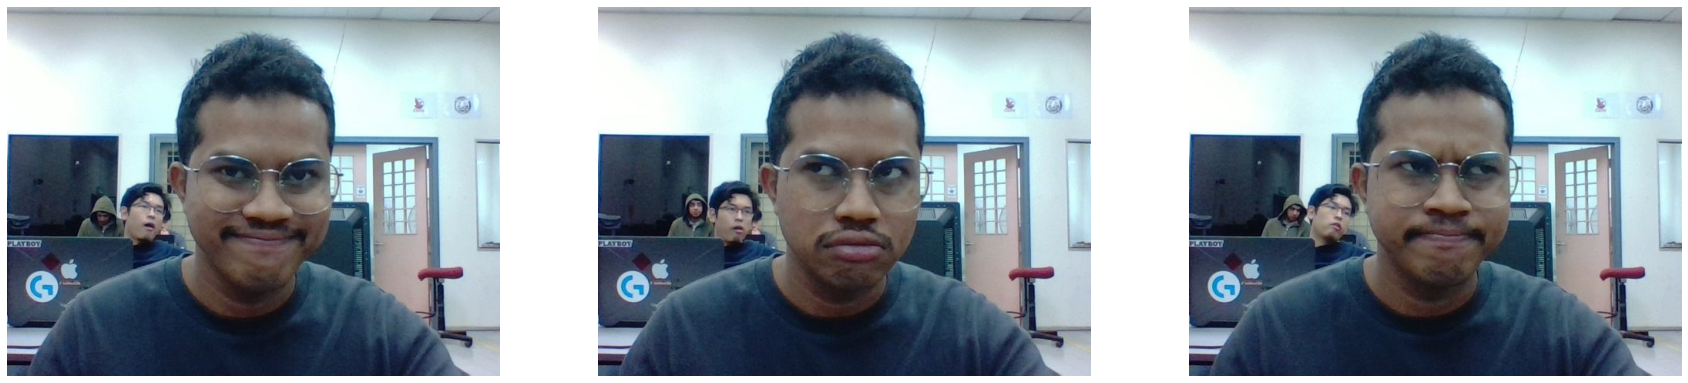

In [25]:
imagefiles =glob.glob(path+"face/*")
imagefiles.sort()
images=[]
for filename in imagefiles:
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)
num_images =len(images)

plt.figure(figsize=[30,10])
num_cols=3
num_rows=math.ceil(num_images/num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plt.axis('off')
  plt.imshow(images[i])

In [26]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
  
# A function for plotting the images
  
  
def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()

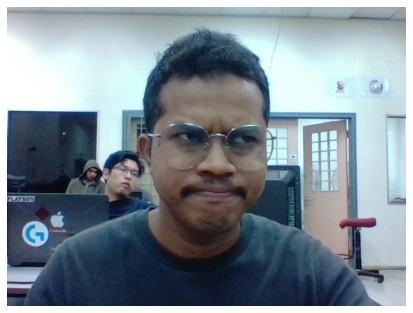

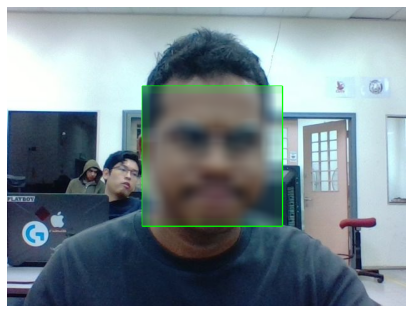

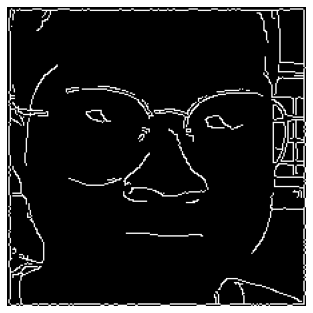

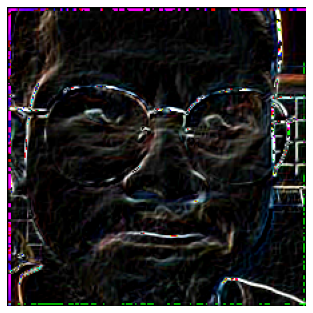

In [30]:
# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread(path+'face/Safwan3.jpg')
  
# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
# plotting the original image
plotImages(image)

face_data = face_cascade.detectMultiScale(image, 1.3, 5)

for (x, y, w, h) in face_data:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = image[y:y+h, x:x+w]
    
    #applying canny
    canny = cv2.Canny(roi,100,250)    
    #applying sobel
    sobelx = cv2.Sobel(roi, cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(roi, cv2.CV_8U,0,1,ksize=3)
    imgSobel = sobelx + sobely
    
    # applying a gaussian blur over this new rectangle area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)
    # impose this blurred image on original image to get final image
    image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
    
  

# Display the output
plotImages(image)
plotImages(canny)
plotImages(imgSobel)
